In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

In [2]:
#Resetting and starting a new TensorFlow session
ops.reset_default_graph()
sess = tf.Session()

In [3]:
###### Numerical Predictions ######
x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)

L2 norm is also called the Euclidean loss function. It is a great loss function because it is very curved near the target and algorithms can use this fact to converge to the target more slowly, the closer it gets to the minima.

In [4]:
# L2 loss
# L = (pred - actual)^2
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)

L1 norm is also known as the absolute loss function. It is non smooth at the minima and can result in algorithms not converging well.

In [5]:
# L1 loss
# L = abs(pred - actual)
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)

Pseudo-Huber loss function takes the best of both the L1 and L2 norms by being convex near the minima and less steeep for extreme values. The form depends on a parameter delta

In [7]:
# Pseudo-Huber loss
# L = delta^2 * (sqrt(1 + ((pred - actual)/delta)^2) - 1)
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals)/delta1)) - 1.)
phuber1_y_out = sess.run(phuber1_y_vals)

delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_vals)/delta2)) - 1.)
phuber2_y_out = sess.run(phuber2_y_vals)

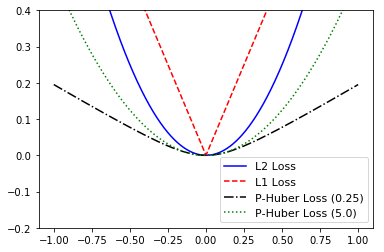

In [10]:
# Plot the output:
x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k-.', label='P-Huber Loss (0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

L1 loss is not a good choice for optimization since the function is non-differentiable at some points.

In [25]:
###### Categorical Predictions ######
x_vals = tf.linspace(-3., 5., 500)
target = tf.constant(1.)
targets = tf.fill([500,], 1.)

In [26]:
# Hinge loss
# Use for predicting binary (-1, 1) classes
# L = max(0, 1 - (pred * actual))
hinge_y_vals = tf.maximum(0., 1. - tf.multiply(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)

In [27]:
# Cross entropy loss
# L = -actual * (log(pred)) - (1-actual)(log(1-pred))
xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. - target), tf.log(1. - x_vals))
xentropy_y_out = sess.run(xentropy_y_vals)

In [28]:
# Sigmoid entropy loss
# L = -actual * (log(sigmoid(pred))) - (1-actual)(log(1-sigmoid(pred)))
# or
# L = max(actual, 0) - actual * pred + log(1 + exp(-abs(actual)))
xentropy_sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_vals, labels=targets)
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)

In [29]:
# Weighted (softmax) cross entropy loss
# L = -actual * (log(pred)) * weights - (1-actual)(log(1-pred))
# or
# L = (1 - pred) * actual + (1 + (weights - 1) * pred) * log(1 + exp(-actual))
weight = tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(x_vals, targets, weight)
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)

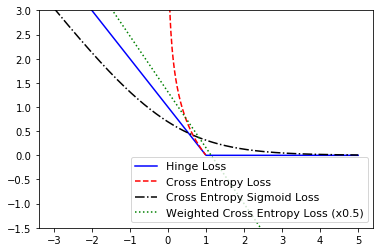

In [30]:
# Plot the output
x_array = sess.run(x_vals)
plt.plot(x_array, hinge_y_out, 'b-', label='Hinge Loss')
plt.plot(x_array, xentropy_y_out, 'r--', label='Cross Entropy Loss')
plt.plot(x_array, xentropy_sigmoid_y_out, 'k-.', label='Cross Entropy Sigmoid Loss')
plt.plot(x_array, xentropy_weighted_y_out, 'g:', label='Weighted Cross Entropy Loss (x0.5)')
plt.ylim(-1.5, 3)
#plt.xlim(-1, 3)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

In [23]:
# Softmax entropy loss
# L = -actual * (log(softmax(pred))) - (1-actual)(log(1-softmax(pred)))
unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits(logits=unscaled_logits, labels=target_dist)
print(sess.run(softmax_xentropy))

[ 1.16012561]


In [24]:
# Sparse entropy loss
# Use when classes and targets have to be mutually exclusive
# L = sum( -actual * log(pred) )
unscaled_logits = tf.constant([[1., -3., 10.]])
sparse_target_dist = tf.constant([2])
sparse_xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=unscaled_logits, labels=sparse_target_dist)
print(sess.run(sparse_xentropy))

[ 0.00012564]


Summary

| loss function   |       Use       |             Advantages             |           Disadvantages             |
|-----------------|-----------------|------------------------------------|-------------------------------------|
|      L2         |    Regression   |             More Stable            |             Less Robust             |
|-----------------|-----------------|------------------------------------|-------------------------------------|
|      L1         |    Regression   |             More Robust            |             Less Stable             |         
|-----------------|-----------------|------------------------------------|-------------------------------------|
|   Pseudo-Huber  |    Regression   |       More robust and stable       |      One additional parameter       |
|-----------------|-----------------|------------------------------------|-------------------------------------|
|     Hinge       |  Classification | Create a max margin for use in SVM | Unbounded loss affected by outliers |
|-----------------|-----------------|------------------------------------|-------------------------------------|
|   Cross-entropy |  Classification |            More stable             |       Unbounded loss, less robust   |
|-----------------|-----------------|------------------------------------|-------------------------------------|